In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from src.text_pipeline import text_to_vector, preprocess, remove_stopwords, stemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [2]:
all_transcripts = pd.read_csv('tables/all_transcripts')

In [29]:
all_transcripts = all_transcripts[all_transcripts['Speaker'] != 'speaker']
all_transcripts = all_transcripts[all_transcripts['Speaker'] != 'bennet']
all_transcripts = all_transcripts[all_transcripts['Speaker'] != 'question']

In [94]:
lower_list = []
for i in all_transcripts['State']:
    if i == 'los angeles':
        lower_list.append('california')
    else:
        lower_list.append(i.lower())
all_transcripts['State'] = lower_list

In [95]:
all_transcripts['processed'] = stemmer(remove_stopwords(all_transcripts['Line']))

In [96]:
dummied_df = pd.concat([all_transcripts.drop(['State'], axis=1), pd.get_dummies(all_transcripts['State'])], axis=1)

In [97]:
dummied_df = dummied_df.drop(['3'], axis=1)

In [98]:
dummied_df

,Line,Speaker,processed,california,florida,georgia,iowa,michigan,mississippi,nevada,new hampshire,new york,ohio,texas
2,thank you. it’s good to be here.,warren,thank you. it good here.,0,1,0,0,0,0,0,0,0,0,0
4,i think of it this way. who is this economy r...,warren,think way. economi realli work for? it great t...,0,1,0,0,0,0,0,0,0,0,0
5,it’s doing great for giant oil companies that...,warren,it great giant oil compani want drill everywhe...,0,1,0,0,0,0,0,0,0,0,0
7,"well, first the economy. we know that not eve...",klobuchar,"well, first economy. know everyon share prospe...",0,1,0,0,0,0,0,0,0,0,0
8,"secondly, i’d use pell grants. i’d double the...",klobuchar,"secondly, i'd use pell grants. i'd doubl $6,00...",0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10396,my campaign is bigger and stronger now because...,warren,campaign bigger stronger peopl work julian cam...,0,0,0,0,0,0,1,0,0,0,0
10397,someone was taking a picture the other day whe...,warren,someon take pictur day one campaign headquarte...,0,0,0,0,0,0,1,0,0,0,0
10398,"and julian castro, who has endorsed me, who is...",warren,"julian castro, endors me, line.",0,0,0,0,0,0,1,0,0,0,0
10399,"i swear to you, i could not ask for a better p...",warren,"swear you, could ask better partner julian. le...",0,0,0,0,0,0,1,0,0,0,0


In [99]:
vectorizer, vector, vector_pd = text_to_vector(all_transcripts['processed'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(vector_pd, dummied_df['new hampshire'])

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred_class = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)

In [102]:
vector_pd

,000,00000702,00010101,00010336,000131,00013615,000219,000232,000243,000252,...,zach,zack,zealand,zelenski,zero,zest,zip,zippo,zone,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
print(f1_score(y_test, rf_pred_class, average='weighted'))
print(precision_score(y_test, rf_pred_class, average='weighted'))
print(recall_score(y_test, rf_pred_class, average='weighted'))

0.7056540789074589
0.7190801825572983
0.7635345364032359


In [104]:
svm = LinearSVC(class_weight = 'balanced', random_state = 27)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)
print(f1_score(y_test, clf_pred, average='weighted'))
print(precision_score(y_test, clf_pred, average='weighted'))
print(recall_score(y_test, clf_pred, average='weighted'))

0.6639849777691682
0.6991317411934838
0.7598008711885501


In [122]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)
print(f1_score(y_test, lr_pred, average='weighted'))
print(precision_score(y_test, lr_pred, average='weighted'))
print(recall_score(y_test, lr_pred, average='weighted'))

0.719438566635779
0.7108515295477852
0.7467330429371499


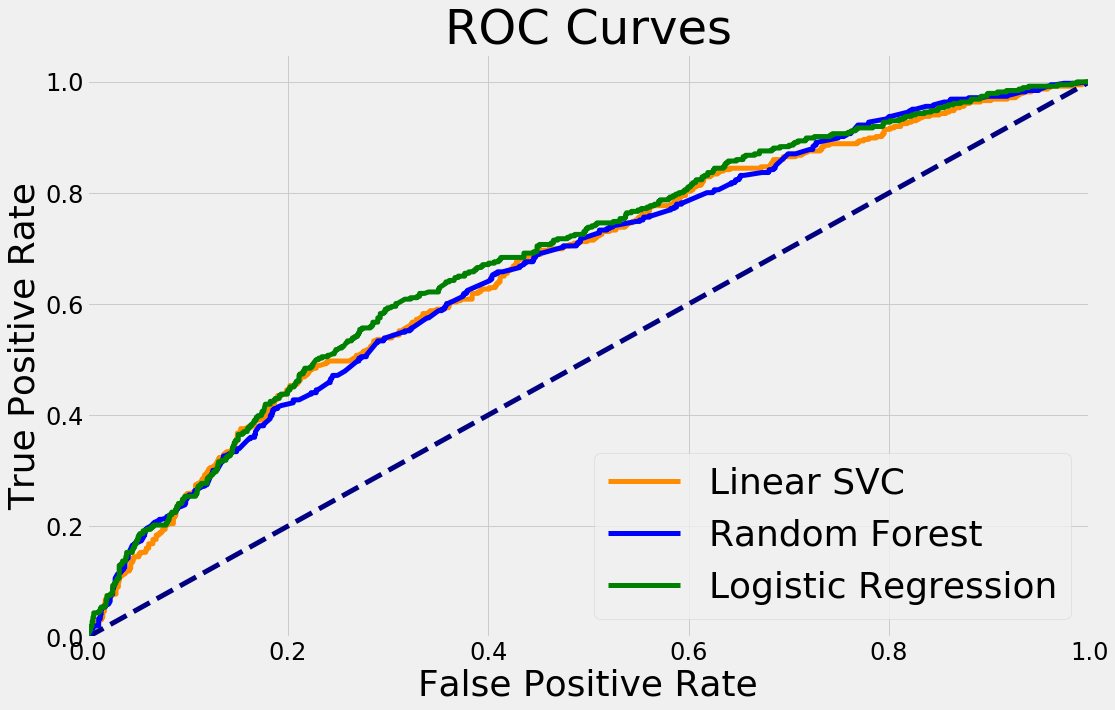

In [123]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, clf_prob[:,1])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

rpr = dict()
dpr = dict()
doc_auc = dict()

for i in range(2):
    rpr[i], dpr[i], _ = roc_curve(y_test, rf_prob[:,1])
    
rpr["micro"], dpr["micro"], _ = roc_curve(y_test.ravel(), rf_pred_class.ravel())
doc_auc["micro"] = auc(rpr["micro"], dpr["micro"])

lpr = dict()
mpr = dict()
doc_auc = dict()

for i in range(2):
    lpr[i], mpr[i], _ = roc_curve(y_test, lr_prob[:,1])
    
lpr["micro"], mpr["micro"], _ = roc_curve(y_test.ravel(), lr_pred.ravel())
doc_auc["micro"] = auc(lpr["micro"], mpr["micro"])

plt.figure(figsize = (16,10))
lw = 5
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='Linear SVC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(rpr[1], dpr[1], color = 'blue',
        lw=lw, label = 'Random Forest')
plt.plot(lpr[1], mpr[1], color = 'green',
        lw=lw, label = 'Logistic Regression')
plt.xlim([0.0, 1.0])
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 36)
plt.ylabel('True Positive Rate', fontsize = 36)
plt.title('ROC Curves', fontsize = 48)
plt.legend(loc="lower right", fontsize= 36)
plt.show()

### State Recommender System

In [105]:
bow_states = all_transcripts.groupby('State')['processed'].apply(' '.join)

In [106]:
bow_states = bow_states.to_frame()

In [107]:
bow_states = bow_states[1:]

In [108]:
state_vectorizer, state_vector, state_vector_pd = text_to_vector(bow_states['processed'])

In [109]:
state_vector_pd

,000,00000702,00010101,00010336,000131,00013615,000219,000232,000243,000252,...,zach,zack,zealand,zelenski,zero,zest,zip,zippo,zone,zuckerberg
0,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,6,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,1,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,1,0,1,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,17,0,2,0,2,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,5,0,0,0,1,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,3,0,0,0,0,1


In [110]:
cosine_sim = cosine_similarity(state_vector_pd, state_vector_pd)

In [111]:
indices = pd.Series(bow_states.index)

def recommendations(state, cosine_sim = cosine_sim):
    
    # initializing the empty list of similar states
    similar_states= []
    
    # gettin the index of the state that matches the title
    idx = indices[indices == state].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 3 most similar states
    top_3_indices = list(score_series.iloc[1:4].index)
    
    # populating the list with the states
    for i in top_3_indices:
        similar_states.append(list(bow_states.index)[i])
        
    return similar_states

In [112]:
recommendations('florida')

['ohio', 'texas', 'california']

In [113]:
recommendations('iowa')

['new hampshire', 'california', 'ohio']

In [114]:
recommendations('new york')

['new hampshire', 'iowa', 'california']

In [115]:
recommendations('california')

['new hampshire', 'nevada', 'georgia']

In [117]:
recommendations('michigan')

['ohio', 'texas', 'florida']